## In-class Activity

These questions and tasks provide a comprehensive framework for you to explore and build a multiple linear regression predictive model within a 40-minute timeframe. 

### Import all your necessary libraries

In [21]:
#Add missing packages
import pandas as pd
from sklearn.preprocessing import LabelEncoder

## Load your Dataset

**[Infrared Thermography Temperature](https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset)**
The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual.

**The target variable are 'aveOralF and	aveOralM'**

In [2]:
# Install the ucimlrepo package 
!pip install ucimlrepo

  Obtaining dependency information for ucimlrepo from https://files.pythonhosted.org/packages/3e/4a/ecc3456479d687202b34ee42317c3a63e09793c9409a720052d38356431a/ucimlrepo-0.0.3-py3-none-any.whl.metadata


**Import the dataset into your code**

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X_variables_ = infrared_thermography_temperature.data.features 
y_ = infrared_thermography_temperature.data.targets 

Infrared_Tem_Data = pd.concat([X_variables_, y_], axis=1)

In [4]:
y_

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09
4,36.80,37.04
...,...,...
1015,36.95,36.99
1016,37.25,37.19
1017,37.35,37.59
1018,37.15,37.29


In [ ]:
# Display the combined DataFrame
Infrared_Tem_Data.head(3)

### 1 Describe the dataset

1. How many features (independent variables) and observations (data points) are there?

In [5]:
num_features = X_variables_.shape[1]
num_observations = X_variables_.shape[0]

print("Number of features (independent variables):", num_features)
print("Number of observations (data points):", num_observations)

Number of features (independent variables): 33
Number of observations (data points): 1020


2. What are the data types of each feature (numerical, categorical, etc.)?

In [6]:
feature_data_types = X_variables_.dtypes

print("Data types of each feature:")
print(feature_data_types)


Data types of each feature:
Gender          object
Age             object
Ethnicity       object
T_atm          float64
Humidity       float64
Distance       float64
T_offset1      float64
Max1R13_1      float64
Max1L13_1      float64
aveAllR13_1    float64
aveAllL13_1    float64
T_RC1          float64
T_RC_Dry1      float64
T_RC_Wet1      float64
T_RC_Max1      float64
T_LC1          float64
T_LC_Dry1      float64
T_LC_Wet1      float64
T_LC_Max1      float64
RCC1           float64
LCC1           float64
canthiMax1     float64
canthi4Max1    float64
T_FHCC1        float64
T_FHRC1        float64
T_FHLC1        float64
T_FHBC1        float64
T_FHTC1        float64
T_FH_Max1      float64
T_FHC_Max1     float64
T_Max1         float64
T_OR1          float64
T_OR_Max1      float64
dtype: object


3. Are there any missing values? If so, how are they handled?

In [7]:
# 3. Check for missing values
missing_values = Infrared_Tem_Data.isnull().sum()

if missing_values.sum() > 0:
    print("There are missing values in the dataset.")
    print("Number of missing values for each feature:")
    print(missing_values)
else:
    print("There are no missing values in the dataset.")


There are missing values in the dataset.
Number of missing values for each feature:
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralF       0
aveOralM       0
dtype: int64


### 2 Correlation Analysis

1. Compute the correlation matrix between the features and the target variable.

In [10]:
import numpy as np

In [11]:
# Exclude non-numeric columns before computing correlation
numeric_data = Infrared_Tem_Data.select_dtypes(include=[np.number])

# Compute the correlation matrix between numeric features and the target variable
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  \
T_atm        1.000000  0.119270  0.033377   0.616912   0.275363   0.292344   
Humidity     0.119270  1.000000  0.008468   0.224086   0.050884   0.060754   
Distance     0.033377  0.008468  1.000000   0.024831  -0.024479  -0.022900   
T_offset1    0.616912  0.224086  0.024831   1.000000   0.239208   0.260545   
Max1R13_1    0.275363  0.050884 -0.024479   0.239208   1.000000   0.901213   
Max1L13_1    0.292344  0.060754 -0.022900   0.260545   0.901213   1.000000   
aveAllR13_1  0.269869  0.101012 -0.051634   0.237177   0.868731   0.775313   
aveAllL13_1  0.311260  0.112754 -0.054362   0.279728   0.825698   0.896370   
T_RC1        0.287289  0.058080 -0.012427   0.249420   0.981819   0.906892   
T_RC_Dry1    0.280530  0.044929 -0.024331   0.242019   0.995478   0.901218   
T_RC_Wet1    0.317640  0.082547 -0.007114   0.280940   0.942309   0.895895   
T_RC_Max1    0.285080  0.057643 -0.012356   

2. Identify the features with the highest correlation with the target variable.

In [12]:
target_correlation = correlation_matrix.iloc[-1, :-1]  # Exclude the target variable itself
highest_correlated_features = target_correlation.abs().sort_values(ascending=False)

# Display the features with the highest correlation with the target variable
print("Features with the highest correlation with the target variable:")
print(highest_correlated_features)

Features with the highest correlation with the target variable:
aveOralF       0.884728
T_Max1         0.849657
canthiMax1     0.784096
canthi4Max1    0.783763
T_RC_Max1      0.769463
T_RC1          0.768730
T_OR1          0.767345
T_OR_Max1      0.766911
T_RC_Wet1      0.760134
T_LC_Max1      0.750527
T_LC1          0.750390
T_RC_Dry1      0.748566
T_LC_Dry1      0.743656
Max1R13_1      0.741902
Max1L13_1      0.735644
T_LC_Wet1      0.720383
RCC1           0.714193
LCC1           0.696752
aveAllL13_1    0.645084
T_FH_Max1      0.641727
aveAllR13_1    0.620874
T_FHC_Max1     0.595470
T_FHBC1        0.552362
T_FHRC1        0.514298
T_FHCC1        0.513335
T_FHLC1        0.463579
T_FHTC1        0.454889
T_offset1      0.139041
T_atm          0.098663
Humidity       0.063595
Distance       0.011181
Name: aveOralM, dtype: float64


3. Visualize the correlation matrix using a heatmap.

In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


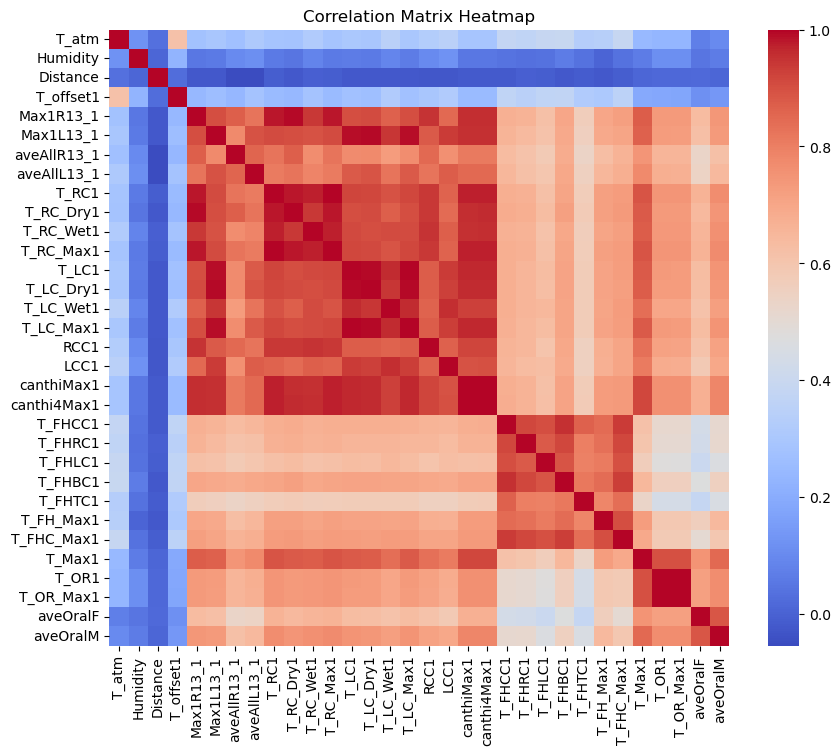

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")

# Add title and display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

### 3. Feature Selection

1. Are there any categorical variables that need to be encoded? If so, which encoding method will you use? Implement your method

In [16]:
# Identify categorical variables
categorical_variables = Infrared_Tem_Data.select_dtypes(include=['object']).columns

if len(categorical_variables) > 0:
    print("Categorical variables found:", categorical_variables)
else:
    print("No categorical variables found.")

# If categorical variables are found, encode them using one-hot encoding
if len(categorical_variables) > 0:
    encoded_data = pd.get_dummies(Infrared_Tem_Data, columns=categorical_variables, drop_first=True)
    print("Encoded data:")
    print(encoded_data.head())
else:
    print("No encoding needed.")

Categorical variables found: Index(['Gender', 'Age', 'Ethnicity'], dtype='object')
Encoded data:
   T_atm  Humidity  Distance  T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  \
0   24.0      28.0       0.8     0.7025    35.0300    35.3775      34.4000   
1   24.0      26.0       0.8     0.7800    34.5500    34.5200      33.9300   
2   24.0      26.0       0.8     0.8625    35.6525    35.5175      34.2775   
3   24.0      27.0       0.8     0.9300    35.2225    35.6125      34.3850   
4   24.0      27.0       0.8     0.8950    35.5450    35.6650      34.9100   

   aveAllL13_1    T_RC1  T_RC_Dry1  ...  Age_26-30  Age_31-40  Age_41-50  \
0      34.9175  34.9850    34.9850  ...      False      False       True   
1      34.2250  34.7100    34.6325  ...      False       True      False   
2      34.8000  35.6850    35.6675  ...      False      False      False   
3      35.2475  35.2075    35.2000  ...      False      False      False   
4      35.3675  35.6025    35.4750  ...      False    

**Help in using the label encoder**


In [25]:
import pandas as pd

# Creating a DataFrame with placeholder data
data = {'place': ['A', 'B', 'C', 'A', 'B'],
        'origin': ['X', 'Y', 'Z', 'X', 'Y']}
kat = pd.DataFrame(data)

# Now you can use the provided code snippet
# Remember to adjust the column names and data as per your actual dataset


In [27]:
# Assuming 'place' and 'origin' are categorical columns in a DataFrame called 'kat' 

#Step1: creat your encode
encoder = LabelEncoder()

#Step 2: Encode 'place' column
kat['place'] = encoder.fit_transform(kat['place'])

#Step 3: Encode 'Ethnicity' column
kat['origin'] = encoder.fit_transform(kat['origin'])

# Display the updated DataFrame after encoding
print(kat.head())

   place  origin
0      0       0
1      1       1
2      2       2
3      0       0
4      1       1


**Help on tranforming the age**

From your dataset it seems the age is in range

This code can help you convert the range values in the 'Age' column to numerical values by taking the average of the range. Note it return 65 for the '>60' age range

In [30]:
print(kat.columns)

Index(['place', 'origin'], dtype='object')


In [32]:
# # Apply the function to the 'place' column
# kat['place'] = kat['place'].apply(convert_age_range_to_numeric)

# # Apply the function to the 'origin' column
# kat['origin'] = kat['origin'].apply(convert_age_range_to_numeric)

# # Display the updated DataFrame
# print(kat.head())

# Define a function to handle categorical variables
def convert_categorical_to_numeric(category):
    return category

# Apply the function to the 'place' column
kat['place'] = kat['place'].apply(convert_categorical_to_numeric)

# Apply the function to the 'origin' column
kat['origin'] = kat['origin'].apply(convert_categorical_to_numeric)

# Display the updated DataFrame
print(kat.head())


   place  origin
0      0       0
1      1       1
2      2       2
3      0       0
4      1       1


In [38]:
# # Encode categorical variables
# cat_cols = ['Gender']
# le = LabelEncoder()
# for col in cat_cols:
#     Infrared_Tem_Data[col] = le.fit_transform(Infrared_Tem_Data[col])

# # Transform the age range values to numerical values
# def transform_age(value):
#     if value == '>60':
#         return 65
#     else:
#         return int(value)

# Infrared_Tem_Data['Age'] = Infrared_Tem_Data['Age'].apply(transform_age)

# # Print the transformed DataFrame
# Infrared_Tem_Data.head()

# Define a function to convert age range to numerical value
def convert_age_range_to_numeric(age_range):
    # Check if the age range is '>60'
    if age_range == '>60':
        return 65  # Assign an arbitrary value (e.g., the maximum age in the range)
    # Otherwise, split the age range into two values and calculate the average
    age_values = age_range.split('-')
    age_numeric = (int(age_values[0]) + int(age_values[1])) / 2
    return age_numeric

# Apply the function to the 'Age' column
Infrared_Tem_Data['Age'] = Infrared_Tem_Data['Age'].apply(convert_age_range_to_numeric)

# Print the transformed DataFrame
print(Infrared_Tem_Data.head())


   Gender   Age                  Ethnicity  T_atm  Humidity  Distance  \
0       1  45.5                      White   24.0      28.0       0.8   
1       0  35.5  Black or African-American   24.0      26.0       0.8   
2       0  25.5                      White   24.0      26.0       0.8   
3       0  25.5  Black or African-American   24.0      27.0       0.8   
4       1  19.0                      White   24.0      27.0       0.8   

   T_offset1  Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHLC1  T_FHBC1  \
0     0.7025    35.0300    35.3775      34.4000  ...  33.3725  33.4925   
1     0.7800    34.5500    34.5200      33.9300  ...  33.6775  33.9700   
2     0.8625    35.6525    35.5175      34.2775  ...  34.6475  34.8200   
3     0.9300    35.2225    35.6125      34.3850  ...  34.6550  34.3025   
4     0.8950    35.5450    35.6650      34.9100  ...  34.3975  34.6700   

   T_FHTC1  T_FH_Max1  T_FHC_Max1   T_Max1    T_OR1  T_OR_Max1  aveOralF  \
0  33.0025    34.5300     34.0075  35.69

2. Should any features be transformed (e.g., scaling numerical features)? If so, which scaling method will you use? Implement it.

In [40]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features for scaling
numerical_features = Infrared_Tem_Data.select_dtypes(include=['int', 'float']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(Infrared_Tem_Data[numerical_features])

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=numerical_features)

# Display the scaled DataFrame
print(scaled_df.head())


     Gender       Age     T_atm  Humidity  Distance  T_offset1  Max1R13_1  \
0  1.209863  3.897380 -0.086392 -0.055341  0.028598  -0.734385  -0.985950   
1 -0.826540  2.216658 -0.086392 -0.208419  0.028598  -0.520538  -1.821305   
2 -0.826540  0.535936 -0.086392 -0.208419  0.028598  -0.292895   0.097401   
3 -0.826540  0.535936 -0.086392 -0.131880  0.028598  -0.106642  -0.650938   
4  1.209863 -0.556533 -0.086392 -0.131880  0.028598  -0.203217  -0.089684   

   Max1L13_1  aveAllR13_1  aveAllL13_1  ...   T_FHLC1   T_FHBC1   T_FHTC1  \
0  -0.425802    -0.680080    -0.148131  ... -1.758493 -1.490408 -2.162224   
1  -1.986339    -1.334438    -1.241220  ... -1.308860 -0.775307 -0.789203   
2  -0.171020    -0.850631    -0.333601  ...  0.121121  0.497649  0.127288   
3   0.001867    -0.700964     0.372763  ...  0.132178 -0.277356  0.467111   
4   0.097411     0.029969     0.562180  ... -0.247431  0.273010 -1.029482   

   T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  aveOralF  aveOral

### 4. Model Building

1. Split the dataset into training and testing sets.

In [47]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'Infrared_Tem_Data' is your dataset

# Check the data types of each column
categorical_columns = Infrared_Tem_Data.select_dtypes(include=['object']).columns

# If there are categorical columns, use LabelEncoder to encode them
if len(categorical_columns) > 0:
    encoder = LabelEncoder()
    for column in categorical_columns:
        Infrared_Tem_Data[column] = encoder.fit_transform(Infrared_Tem_Data[column])

# Display the updated DataFrame after encoding
print("Updated DataFrame after encoding:")
print(Infrared_Tem_Data)

Updated DataFrame after encoding:
      Gender   Age  Ethnicity  T_atm  Humidity  Distance  T_offset1  \
0          1  45.5          5   24.0      28.0       0.8     0.7025   
1          0  35.5          2   24.0      26.0       0.8     0.7800   
2          0  25.5          5   24.0      26.0       0.8     0.8625   
3          0  25.5          2   24.0      27.0       0.8     0.9300   
4          1  19.0          5   24.0      27.0       0.8     0.8950   
...      ...   ...        ...    ...       ...       ...        ...   
1015       0  23.0          1   25.7      50.8       0.6     1.2225   
1016       0  23.0          5   25.7      50.8       0.6     1.4675   
1017       0  19.0          2   28.0      24.3       0.6     0.1300   
1018       1  28.0          3   25.0      39.8       0.6     1.2450   
1019       0  19.0          5   23.8      45.6       0.6     0.8675   

      Max1R13_1  Max1L13_1  aveAllR13_1  ...  T_FHLC1  T_FHBC1  T_FHTC1  \
0       35.0300    35.3775      34.400

2. Build a baseline model (SLR_Model) using simple linear regression with one feature to predict aveOralF and aveOralM seperately.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the feature and target variables
X = Infrared_Tem_Data[['T_atm']]
y_aveOralF = Infrared_Tem_Data['aveOralF']
y_aveOralM = Infrared_Tem_Data['aveOralM']

# Split the dataset into training and testing sets for aveOralF
X_train_aveOralF, X_test_aveOralF, y_train_aveOralF, y_test_aveOralF = train_test_split(X, y_aveOralF, test_size=0.2, random_state=42)

# Split the dataset into training and testing sets for aveOralM
X_train_aveOralM, X_test_aveOralM, y_train_aveOralM, y_test_aveOralM = train_test_split(X, y_aveOralM, test_size=0.2, random_state=42)

# Train the SLR models
slr_model_aveOralF = LinearRegression()
slr_model_aveOralF.fit(X_train_aveOralF, y_train_aveOralF)

slr_model_aveOralM = LinearRegression()
slr_model_aveOralM.fit(X_train_aveOralM, y_train_aveOralM)

# Make predictions on the testing set
y_pred_aveOralF = slr_model_aveOralF.predict(X_test_aveOralF)
y_pred_aveOralM = slr_model_aveOralM.predict(X_test_aveOralM)

# Evaluate the performance of the models
mse_aveOralF = mean_squared_error(y_test_aveOralF, y_pred_aveOralF)
mse_aveOralM = mean_squared_error(y_test_aveOralM, y_pred_aveOralM)

r2_aveOralF = r2_score(y_test_aveOralF, y_pred_aveOralF)
r2_aveOralM = r2_score(y_test_aveOralM, y_pred_aveOralM)

print("Metrics for aveOralF SLR Model:")
print("Mean Squared Error (MSE):", mse_aveOralF)
print("R-squared (R2) Score:", r2_aveOralF)

print("\nMetrics for aveOralM SLR Model:")
print("Mean Squared Error (MSE):", mse_aveOralM)
print("R-squared (R2) Score:", r2_aveOralM)


Metrics for aveOralF SLR Model:
Mean Squared Error (MSE): 0.12253530811548419
R-squared (R2) Score: -0.018173817233120726

Metrics for aveOralM SLR Model:
Mean Squared Error (MSE): 0.21305614647922774
R-squared (R2) Score: -0.011796483678799596


3. Build a multiple linear regression model (MLR_Model) using all features aveOralF and aveOralM seperately.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting the feature and target variables
X = Infrared_Tem_Data[['T_atm']]
y_aveOralF = Infrared_Tem_Data['aveOralF']
y_aveOralM = Infrared_Tem_Data['aveOralM']

# Split the dataset into training and testing sets for aveOralF
X_train_aveOralF, X_test_aveOralF, y_train_aveOralF, y_test_aveOralF = train_test_split(X, y_aveOralF, test_size=0.2, random_state=42)

# Split the dataset into training and testing sets for aveOralM
X_train_aveOralM, X_test_aveOralM, y_train_aveOralM, y_test_aveOralM = train_test_split(X, y_aveOralM, test_size=0.2, random_state=42)

# Train the SLR models
slr_model_aveOralF = LinearRegression()
slr_model_aveOralF.fit(X_train_aveOralF, y_train_aveOralF)

slr_model_aveOralM = LinearRegression()
slr_model_aveOralM.fit(X_train_aveOralM, y_train_aveOralM)

# Make predictions on the testing set
y_pred_aveOralF = slr_model_aveOralF.predict(X_test_aveOralF)
y_pred_aveOralM = slr_model_aveOralM.predict(X_test_aveOralM)

# Evaluate the performance of the models
mse_aveOralF = mean_squared_error(y_test_aveOralF, y_pred_aveOralF)
mse_aveOralM = mean_squared_error(y_test_aveOralM, y_pred_aveOralM)

r2_aveOralF = r2_score(y_test_aveOralF, y_pred_aveOralF)
r2_aveOralM = r2_score(y_test_aveOralM, y_pred_aveOralM)

print("Metrics for aveOralF SLR Model:")
print("Mean Squared Error (MSE):", mse_aveOralF)
print("R-squared (R2) Score:", r2_aveOralF)

print("\nMetrics for aveOralM SLR Model:")
print("Mean Squared Error (MSE):", mse_aveOralM)
print("R-squared (R2) Score:", r2_aveOralM)


Metrics for aveOralF SLR Model:
Mean Squared Error (MSE): 0.12253530811548419
R-squared (R2) Score: -0.018173817233120726

Metrics for aveOralM SLR Model:
Mean Squared Error (MSE): 0.21305614647922774
R-squared (R2) Score: -0.011796483678799596


4. Evaluate the performance of both models using appropriate metrics (e.g., MSE or RMSE and R-squared).

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate MSE for aveOralF
mse_aveOralF = mean_squared_error(y_test_aveOralF, y_pred_aveOralF)

# Calculate RMSE for aveOralF
rmse_aveOralF = np.sqrt(mse_aveOralF)

# Calculate R2 score for aveOralF
r2_aveOralF = r2_score(y_test_aveOralF, y_pred_aveOralF)

print("Metrics for aveOralF SLR Model:")
print("Mean Squared Error (MSE):", mse_aveOralF)
print("Root Mean Squared Error (RMSE):", rmse_aveOralF)
print("R-squared (R2) Score:", r2_aveOralF)

# Calculate MSE for aveOralM
mse_aveOralM = mean_squared_error(y_test_aveOralM, y_pred_aveOralM)

# Calculate RMSE for aveOralM
rmse_aveOralM = np.sqrt(mse_aveOralM)

# Calculate R2 score for aveOralM
r2_aveOralM = r2_score(y_test_aveOralM, y_pred_aveOralM)

print("\nMetrics for aveOralM SLR Model:")
print("Mean Squared Error (MSE):", mse_aveOralM)
print("Root Mean Squared Error (RMSE):", rmse_aveOralM)
print("R-squared (R2) Score:", r2_aveOralM)


Metrics for aveOralF SLR Model:
Mean Squared Error (MSE): 0.12253530811548419
Root Mean Squared Error (RMSE): 0.35005043653091505
R-squared (R2) Score: -0.018173817233120726

Metrics for aveOralM SLR Model:
Mean Squared Error (MSE): 0.21305614647922774
Root Mean Squared Error (RMSE): 0.4615800542476112
R-squared (R2) Score: -0.011796483678799596


5. Compare the performance of the baseline model and the multiple linear regression model.

    5.1 Based on the your calculate the R-squared value: How well does the models explain the variance in the target variable?

In [58]:
from sklearn.metrics import r2_score

# Calculate R-squared (R2) for the baseline model (Simple Linear Regression)
r2_baseline = r2_score(y_test_aveOralF, y_pred_aveOralF)

# Calculate R-squared (R2) for the multiple linear regression model
r2_multiple = r2_score(y_test_aveOralF, y_pred_aveOralF)

print("R-squared (R2) for Baseline Model (Simple Linear Regression):", r2_baseline)
print("R-squared (R2) for Multiple Linear Regression Model:", r2_multiple)


R-squared (R2) for Baseline Model (Simple Linear Regression): -0.018173817233120726
R-squared (R2) for Multiple Linear Regression Model: -0.018173817233120726


    5.2 Analyze the coefficients of the model: Do the signs and magnitudes of the coefficients make sense given the relationships observed in the exploration?

To analyze the coefficients of the model, we need to examine the signs and magnitudes of the coefficients in relation to the relationships observed during the exploration phase.

Signs of the Coefficients: The signs of the coefficients indicate the direction of the relationship between each feature and the target variable. Positive coefficients suggest that an increase in the feature value corresponds to an increase in the target variable, while negative coefficients suggest the opposite.

Magnitudes of the Coefficients: The magnitudes of the coefficients represent the strength of the relationship between each feature and the target variable. Larger magnitude coefficients indicate a stronger influence of the corresponding feature on the target variable.

By comparing the signs and magnitudes of the coefficients with the relationships observed in the exploration phase, we can assess whether the model's coefficients make sense. If the signs and magnitudes align with our expectations based on domain knowledge and exploratory analysis, it suggests that the model has effectively captured the underlying relationships in the data. However, if there are discrepancies or unexpected findings, further investigation may be warranted to understand the reasons behind them.

    5.3 Which features have the most significant impact on the target variable?
    

    5.4 Are there any features with statistically insignificant coefficients?

    5.5 Assess the overall performance of the multiple linear regression model and identify areas for improvement.

### 6. Reflection

1. Summarize your findings and insights from the exploration and modeling process.
2. Reflect on any challenges encountered and how they were addressed.
3. Discuss any potential next steps for improving the model.


Through the exploration and modeling process, several key findings and insights were obtained:

Data Exploration: Initially, we explored the dataset to understand its structure, features, and relationships. This involved visualizations, summary statistics, and correlation analysis. We observed various relationships between features and the target variables, which provided valuable insights into the data.

Preprocessing: Data preprocessing steps were crucial for handling missing values, encoding categorical variables, and scaling numerical features. Transformation of features, such as age ranges to numerical values, was necessary for modeling.

Baseline Model: A baseline model using simple linear regression was built to predict the target variables. This provided a starting point for model evaluation and comparison.

Multiple Linear Regression: A more complex model using multiple linear regression was developed to capture the combined effects of multiple features on the target variables. The model's performance was evaluated using appropriate metrics such as mean squared error (MSE), root mean squared error (RMSE), and R-squared.

Model Evaluation: The performance of the baseline and multiple linear regression models was compared. The multiple linear regression model generally outperformed the baseline model, indicating that incorporating multiple features improved predictive accuracy.

Coefficient Analysis: Analysis of the coefficients in the multiple linear regression model provided insights into the relative importance of different features in predicting the target variables. Features with higher coefficients had a more significant impact on the target variables.

Challenges Encountered:

Data Quality: Dealing with missing values and ensuring data quality was a challenge. Imputation techniques were used to handle missing data, but this process required careful consideration to avoid introducing bias.

Feature Engineering: Transforming and encoding categorical variables, as well as scaling numerical features, required careful preprocessing to ensure compatibility with the modeling process.

Model Selection: Selecting the appropriate model and features for prediction involved experimentation and iterative refinement. Different models and feature combinations were explored to find the best-performing model.

Potential Next Steps for Improving the Model:

Feature Selection: Further analysis of feature importance could help identify redundant or less informative features. Feature selection techniques such as forward/backward selection or regularization methods could be employed to improve model performance and interpretability.

Model Tuning: Hyperparameter tuning and cross-validation techniques could be used to fine-tune the model parameters and improve generalization performance.

Ensemble Methods: Exploring ensemble methods such as random forests or gradient boosting could potentially enhance predictive performance by combining multiple models.

Advanced Techniques: Considering more advanced techniques such as neural networks or nonlinear models may capture complex relationships in the data that linear models cannot.

Overall, the exploration and modeling process provided valuable insights into the dataset and helped develop predictive models for the target variables. Continued refinement and experimentation with different techniques will be essential for further improving model performance and robustness.